In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%reload_ext autoreload

In [4]:
from TargetDistributions.DoubleWell import ManyWellEnergy
from FittedModels.utils.plotting_utils import plot_samples_vs_contours_many_well

In [6]:
from FittedModels.Models.FlowModel import FlowModel
from AIS_train.train_AIS import AIS_trainer
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.utils.plotting_utils import plot_history, plot_distributions, plot_samples

import matplotlib.pyplot as plt
import torch
from Utils.plotting_utils import plot_func2D, plot_distribution
from Utils.numerical_utils import MC_estimate_true_expectation
from Utils.numerical_utils import quadratic_function as expectation_function
torch.set_default_dtype(torch.float64)

def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples_vs_contours_many_well(*args, **kwargs)
    plt.show()

In [7]:
dim = 6
target = ManyWellEnergy(dim=dim, a=-0.5, b=-6)

In [8]:
n_samples_expectation = int(1e4)
n_samples=int(1e4)

# Visualisation

## Vanilla IS with the flow

In [9]:
learnt_sampler = FlowModel(x_dim=dim, scaling_factor=2.0, flow_type="RealNVP", n_flow_steps=60)
vanilla_IS = VanillaImportanceSampling(sampling_distribution=learnt_sampler, target_distribution=target)
with torch.no_grad():
    expectation_vanilla, info_dict_vanilla = \
    vanilla_IS.calculate_expectation(n_samples_expectation, expectation_function=expectation_function)
    print(f"ESS is {info_dict_vanilla['effective_sample_size']/n_samples_expectation}, \
          var is {torch.var(info_dict_vanilla['normalised_sampling_weights'])}")

ESS is 0.0024713500235241754,           var is 4.036775055421917e-06


## Hamiltonian HMC

# Train

In [14]:
learnt_sampler = FlowModel(x_dim=dim, scaling_factor=2.0, flow_type="RealNVP", n_flow_steps=60)
tester = AIS_trainer(target, learnt_sampler, loss_type="DReG", n_distributions=10, n_steps_transition_operator=3,
                    step_size=0.5, transition_operator="HMC", train_AIS_params=True, learnt_dist_kwargs={"lr": 1e-4},
                    importance_param_lr=1e-4)

In [15]:
expectation_before, info_dict_before = tester.AIS_train.calculate_expectation(n_samples_expectation,
                                                                    expectation_function=expectation_function)
print(info_dict_before['effective_sample_size'].item() / n_samples_expectation)

0.012117518090321544


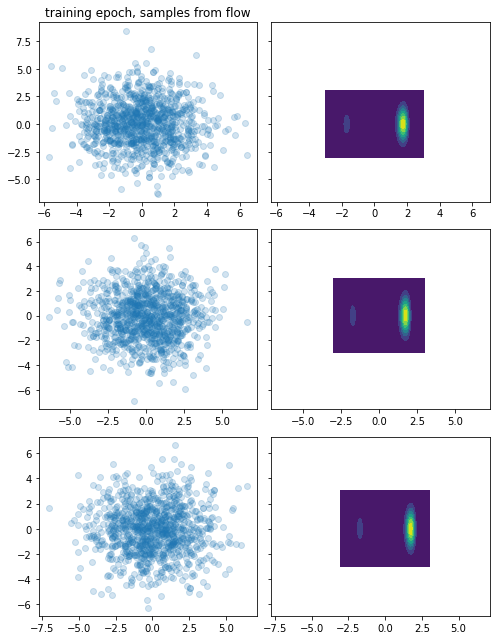

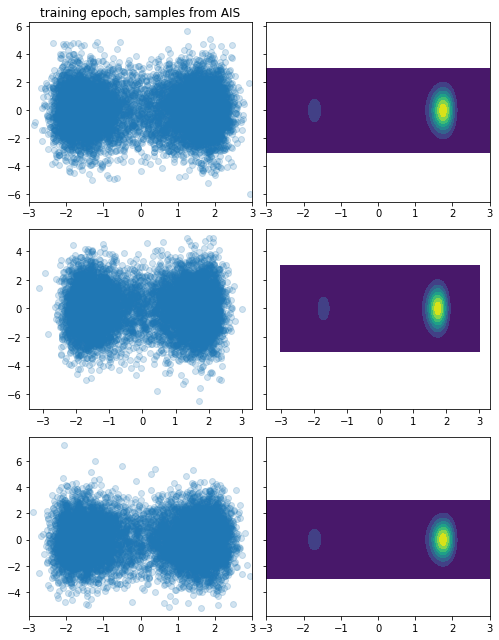

In [16]:
plot_samples_vs_contours_many_well(tester, n_samples=1000,
                                      title=f"training epoch, samples from flow")
plot_samples_vs_contours_many_well(tester, n_samples=None,
                                      title=f"training epoch, samples from AIS",
                                      samples_q=info_dict_before["samples"])

  0%|          | 0/1000 [00:00<?, ?it/s]

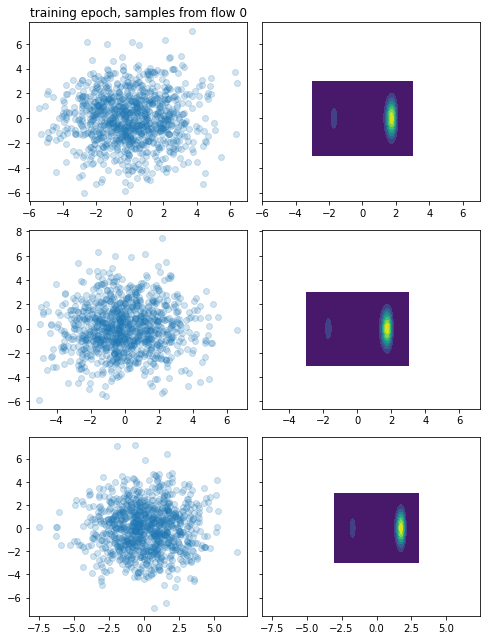

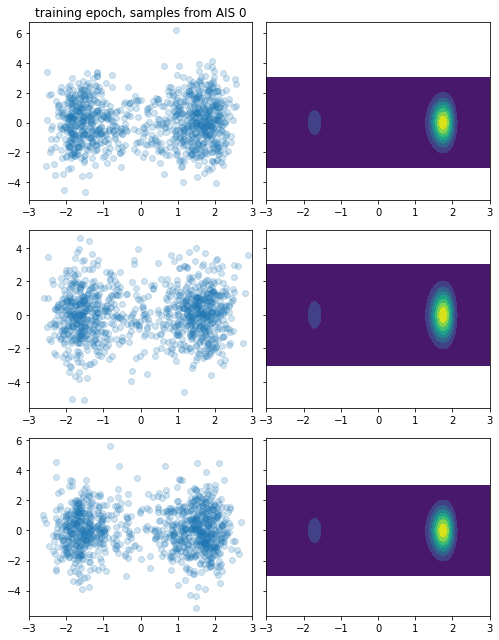

loss: -18.02208421652851,   log_p_x_post_AIS 20.150417697056152, ESS 0.07948497673943454:  25%|██▌       | 250/1000 [39:47<1:49:35,  8.77s/it] 

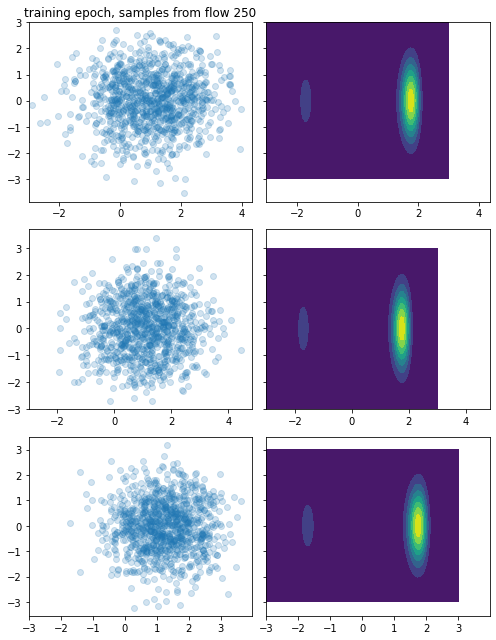

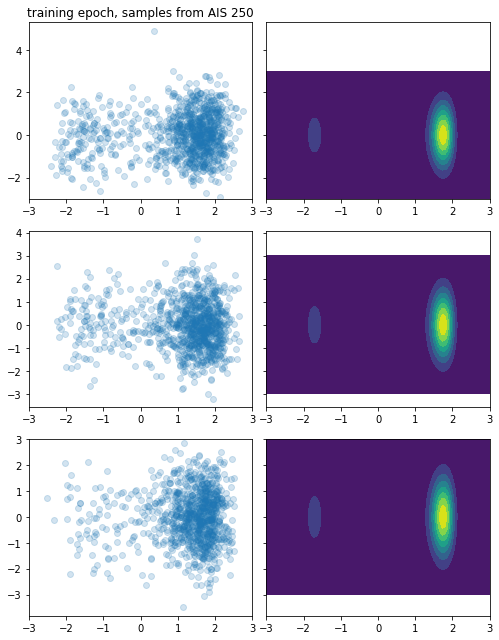

loss: -14.772371259596204,   log_p_x_post_AIS 22.88355330132385, ESS 0.1781169108719545:  50%|█████     | 500/1000 [1:17:04<1:14:35,  8.95s/it]  

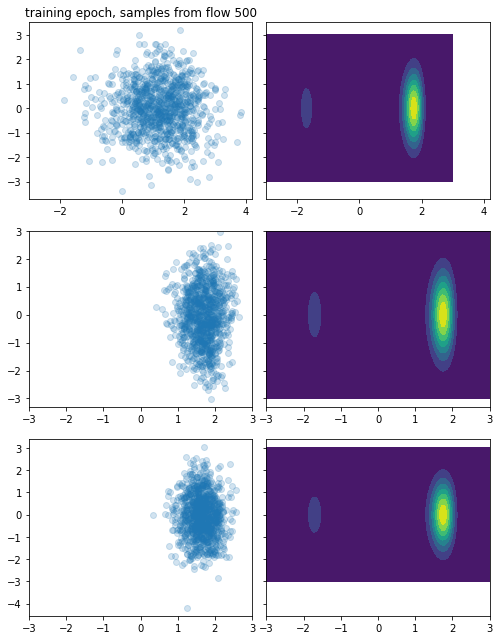

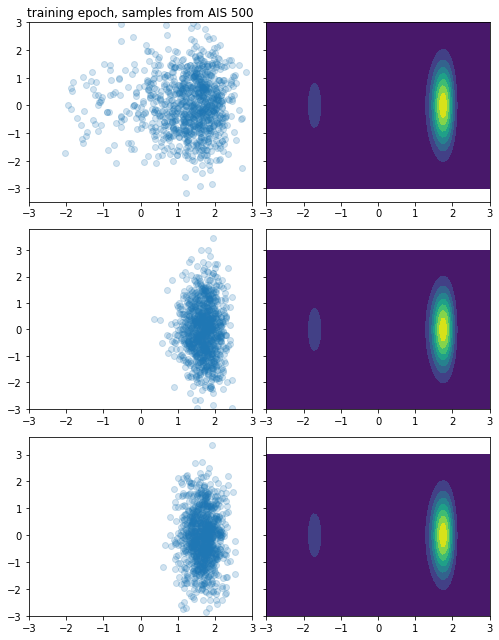

loss: -14.772371259596204,   log_p_x_post_AIS 22.88355330132385, ESS 0.1781169108719545:  51%|█████     | 506/1000 [1:17:48<1:11:45,  8.72s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  51%|█████     | 512/1000 [1:18:44<1:13:08,  8.99s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  51%|█████▏    | 513/1000 [1:18:52<1:10:58,  8.75s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  52%|█████▏    | 516/1000 [1:19:19<1:11:54,  8.91s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  52%|█████▏    | 519/1000 [1:19:46<1:10:03,  8.74s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  52%|█████▏    | 521/1000 [1:20:02<1:06:33,  8.34s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  52%|█████▏    | 522/1000 [1:20:10<1:04:21,  8.08s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  52%|█████▏    | 524/1000 [1:20:26<1:03:42,  8.03s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  52%|█████▎    | 525/1000 [1:20:33<1:02:35,  7.91s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  53%|█████▎    | 527/1000 [1:20:51<1:04:18,  8.16s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  53%|█████▎    | 528/1000 [1:20:58<1:02:14,  7.91s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  53%|█████▎    | 531/1000 [1:21:23<1:02:45,  8.03s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  53%|█████▎    | 533/1000 [1:21:39<1:02:34,  8.04s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  54%|█████▎    | 536/1000 [1:22:05<1:03:32,  8.22s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  54%|█████▍    | 538/1000 [1:22:21<1:02:05,  8.06s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  54%|█████▍    | 539/1000 [1:22:28<1:00:27,  7.87s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  54%|█████▍    | 540/1000 [1:22:36<59:38,  7.78s/it]  

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  54%|█████▍    | 541/1000 [1:22:43<58:38,  7.67s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  54%|█████▍    | 543/1000 [1:22:59<59:31,  7.82s/it]  

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  55%|█████▍    | 546/1000 [1:23:24<1:00:18,  7.97s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  55%|█████▍    | 547/1000 [1:23:31<58:47,  7.79s/it]  

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  55%|█████▌    | 550/1000 [1:23:57<1:02:33,  8.34s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  55%|█████▌    | 551/1000 [1:24:05<1:01:21,  8.20s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  55%|█████▌    | 552/1000 [1:24:13<1:00:39,  8.12s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  55%|█████▌    | 553/1000 [1:24:21<59:26,  7.98s/it]  

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  55%|█████▌    | 554/1000 [1:24:29<59:34,  8.01s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  56%|█████▌    | 555/1000 [1:24:37<59:14,  7.99s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  56%|█████▌    | 556/1000 [1:24:45<58:54,  7.96s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  56%|█████▌    | 557/1000 [1:24:52<58:04,  7.87s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  56%|█████▌    | 558/1000 [1:25:00<58:21,  7.92s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  56%|█████▌    | 559/1000 [1:25:08<58:18,  7.93s/it]

Nan/Inf loss_2 encountered


loss: -15.07706760680217,   log_p_x_post_AIS 23.014058023496844, ESS 0.19911258679994523:  56%|█████▌    | 560/1000 [1:25:16<58:20,  7.95s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  56%|█████▌    | 562/1000 [1:25:33<58:22,  8.00s/it]  

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  56%|█████▋    | 563/1000 [1:25:40<56:54,  7.81s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  56%|█████▋    | 564/1000 [1:25:48<56:18,  7.75s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  57%|█████▋    | 566/1000 [1:26:05<59:25,  8.21s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  57%|█████▋    | 567/1000 [1:26:13<59:29,  8.24s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  57%|█████▋    | 568/1000 [1:26:22<59:17,  8.23s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  57%|█████▋    | 569/1000 [1:26:30<58:47,  8.18s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  57%|█████▋    | 570/1000 [1:26:38<58:55,  8.22s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  57%|█████▋    | 571/1000 [1:26:46<57:06,  7.99s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  57%|█████▋    | 572/1000 [1:26:53<56:04,  7.86s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  57%|█████▋    | 573/1000 [1:27:01<55:08,  7.75s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  57%|█████▋    | 574/1000 [1:27:08<55:02,  7.75s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  57%|█████▊    | 575/1000 [1:27:17<56:12,  7.94s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  58%|█████▊    | 577/1000 [1:27:34<57:25,  8.14s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  58%|█████▊    | 578/1000 [1:27:42<56:50,  8.08s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  58%|█████▊    | 579/1000 [1:27:50<57:21,  8.17s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  58%|█████▊    | 580/1000 [1:27:58<56:44,  8.11s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  58%|█████▊    | 581/1000 [1:28:05<55:16,  7.91s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  58%|█████▊    | 582/1000 [1:28:13<54:50,  7.87s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  58%|█████▊    | 583/1000 [1:28:21<55:10,  7.94s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  58%|█████▊    | 584/1000 [1:28:29<55:04,  7.94s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  58%|█████▊    | 585/1000 [1:28:37<55:20,  8.00s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  59%|█████▊    | 586/1000 [1:28:45<55:05,  7.98s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  59%|█████▊    | 587/1000 [1:28:54<55:14,  8.03s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  59%|█████▉    | 588/1000 [1:29:02<55:44,  8.12s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  59%|█████▉    | 589/1000 [1:29:10<56:00,  8.18s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  59%|█████▉    | 590/1000 [1:29:18<56:04,  8.21s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  59%|█████▉    | 591/1000 [1:29:26<54:43,  8.03s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  59%|█████▉    | 592/1000 [1:29:34<53:32,  7.87s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  59%|█████▉    | 593/1000 [1:29:41<52:49,  7.79s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  59%|█████▉    | 594/1000 [1:29:49<51:56,  7.68s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  60%|█████▉    | 595/1000 [1:29:56<51:31,  7.63s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  60%|█████▉    | 596/1000 [1:30:03<50:54,  7.56s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  60%|█████▉    | 598/1000 [1:30:19<51:44,  7.72s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  60%|█████▉    | 599/1000 [1:30:27<51:40,  7.73s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  60%|██████    | 600/1000 [1:30:35<51:19,  7.70s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  60%|██████    | 601/1000 [1:30:42<50:27,  7.59s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  60%|██████    | 602/1000 [1:30:50<50:08,  7.56s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  60%|██████    | 603/1000 [1:30:57<49:39,  7.50s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  60%|██████    | 604/1000 [1:31:04<49:25,  7.49s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  60%|██████    | 605/1000 [1:31:12<49:07,  7.46s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  61%|██████    | 606/1000 [1:31:19<49:01,  7.46s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  61%|██████    | 607/1000 [1:31:27<48:36,  7.42s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  61%|██████    | 608/1000 [1:31:34<49:00,  7.50s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  61%|██████    | 609/1000 [1:31:42<49:37,  7.61s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  61%|██████    | 610/1000 [1:31:50<50:32,  7.78s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  61%|██████    | 611/1000 [1:31:58<50:18,  7.76s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  61%|██████    | 612/1000 [1:32:06<50:35,  7.82s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  61%|██████▏   | 613/1000 [1:32:14<50:04,  7.76s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  61%|██████▏   | 614/1000 [1:32:21<49:19,  7.67s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  62%|██████▏   | 615/1000 [1:32:28<48:34,  7.57s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  62%|██████▏   | 616/1000 [1:32:36<48:16,  7.54s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  62%|██████▏   | 617/1000 [1:32:43<47:51,  7.50s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  62%|██████▏   | 618/1000 [1:32:51<47:50,  7.52s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  62%|██████▏   | 619/1000 [1:32:58<47:24,  7.46s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  62%|██████▏   | 620/1000 [1:33:06<47:08,  7.44s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  62%|██████▏   | 621/1000 [1:33:13<46:51,  7.42s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  62%|██████▏   | 622/1000 [1:33:20<46:41,  7.41s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  62%|██████▏   | 623/1000 [1:33:28<46:32,  7.41s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  62%|██████▏   | 624/1000 [1:33:35<46:33,  7.43s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  62%|██████▎   | 625/1000 [1:33:43<46:24,  7.43s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  63%|██████▎   | 626/1000 [1:33:50<46:29,  7.46s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  63%|██████▎   | 627/1000 [1:33:58<46:21,  7.46s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  63%|██████▎   | 628/1000 [1:34:05<46:20,  7.47s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  63%|██████▎   | 629/1000 [1:34:13<46:05,  7.45s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  63%|██████▎   | 630/1000 [1:34:20<46:02,  7.47s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  63%|██████▎   | 631/1000 [1:34:28<45:51,  7.46s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  63%|██████▎   | 634/1000 [1:34:52<48:13,  7.91s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  64%|██████▎   | 635/1000 [1:35:00<47:09,  7.75s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  64%|██████▎   | 636/1000 [1:35:08<46:57,  7.74s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  64%|██████▎   | 637/1000 [1:35:15<47:12,  7.80s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  64%|██████▍   | 638/1000 [1:35:23<46:25,  7.69s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  64%|██████▍   | 639/1000 [1:35:30<45:42,  7.60s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  64%|██████▍   | 640/1000 [1:35:38<45:19,  7.55s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  64%|██████▍   | 641/1000 [1:35:45<44:53,  7.50s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  64%|██████▍   | 642/1000 [1:35:53<44:48,  7.51s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  64%|██████▍   | 643/1000 [1:36:00<44:32,  7.49s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  64%|██████▍   | 644/1000 [1:36:08<44:22,  7.48s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  64%|██████▍   | 645/1000 [1:36:15<44:14,  7.48s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  65%|██████▍   | 646/1000 [1:36:23<44:09,  7.48s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  65%|██████▍   | 647/1000 [1:36:30<43:56,  7.47s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  65%|██████▍   | 648/1000 [1:36:37<43:56,  7.49s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  65%|██████▍   | 649/1000 [1:36:45<44:20,  7.58s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  65%|██████▌   | 650/1000 [1:36:53<45:03,  7.73s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  65%|██████▌   | 651/1000 [1:37:01<45:26,  7.81s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  65%|██████▌   | 652/1000 [1:37:09<45:47,  7.90s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  65%|██████▌   | 653/1000 [1:37:17<45:48,  7.92s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  65%|██████▌   | 654/1000 [1:37:25<45:53,  7.96s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  66%|██████▌   | 655/1000 [1:37:33<45:46,  7.96s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  66%|██████▌   | 656/1000 [1:37:41<45:37,  7.96s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  66%|██████▌   | 657/1000 [1:37:49<45:10,  7.90s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  66%|██████▌   | 658/1000 [1:37:57<44:54,  7.88s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  66%|██████▌   | 659/1000 [1:38:04<43:53,  7.72s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  66%|██████▌   | 660/1000 [1:38:12<43:25,  7.66s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  66%|██████▌   | 661/1000 [1:38:19<42:49,  7.58s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  66%|██████▌   | 662/1000 [1:38:27<42:30,  7.55s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  66%|██████▋   | 663/1000 [1:38:34<42:41,  7.60s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  66%|██████▋   | 664/1000 [1:38:42<43:10,  7.71s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  66%|██████▋   | 665/1000 [1:38:50<43:04,  7.72s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  67%|██████▋   | 666/1000 [1:38:58<43:09,  7.75s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  67%|██████▋   | 667/1000 [1:39:06<43:15,  7.79s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  67%|██████▋   | 668/1000 [1:39:14<43:20,  7.83s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  67%|██████▋   | 669/1000 [1:39:22<43:02,  7.80s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  67%|██████▋   | 670/1000 [1:39:29<42:29,  7.73s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  67%|██████▋   | 671/1000 [1:39:36<41:47,  7.62s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  67%|██████▋   | 672/1000 [1:39:44<41:24,  7.58s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  67%|██████▋   | 673/1000 [1:39:51<40:54,  7.51s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  67%|██████▋   | 674/1000 [1:39:59<40:49,  7.51s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  68%|██████▊   | 675/1000 [1:40:07<41:10,  7.60s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  68%|██████▊   | 676/1000 [1:40:14<40:58,  7.59s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  68%|██████▊   | 678/1000 [1:40:31<42:11,  7.86s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  68%|██████▊   | 679/1000 [1:40:38<41:56,  7.84s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  68%|██████▊   | 680/1000 [1:40:46<41:18,  7.74s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  68%|██████▊   | 681/1000 [1:40:53<40:40,  7.65s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  68%|██████▊   | 682/1000 [1:41:01<40:22,  7.62s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  68%|██████▊   | 683/1000 [1:41:08<39:51,  7.55s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  68%|██████▊   | 684/1000 [1:41:16<39:46,  7.55s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  68%|██████▊   | 685/1000 [1:41:23<39:26,  7.51s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  69%|██████▊   | 687/1000 [1:41:40<40:42,  7.80s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  69%|██████▉   | 688/1000 [1:41:47<40:35,  7.81s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  69%|██████▉   | 689/1000 [1:41:55<40:17,  7.77s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  69%|██████▉   | 690/1000 [1:42:03<39:40,  7.68s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  69%|██████▉   | 691/1000 [1:42:10<39:13,  7.62s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  69%|██████▉   | 692/1000 [1:42:17<38:43,  7.54s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  69%|██████▉   | 693/1000 [1:42:25<38:30,  7.53s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  69%|██████▉   | 694/1000 [1:42:32<38:10,  7.49s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  70%|██████▉   | 695/1000 [1:42:40<38:25,  7.56s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  70%|██████▉   | 696/1000 [1:42:47<38:00,  7.50s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  70%|██████▉   | 697/1000 [1:42:55<37:48,  7.49s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  70%|██████▉   | 698/1000 [1:43:02<37:35,  7.47s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  70%|██████▉   | 699/1000 [1:43:10<37:25,  7.46s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  70%|███████   | 700/1000 [1:43:17<37:11,  7.44s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  70%|███████   | 701/1000 [1:43:24<37:04,  7.44s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  70%|███████   | 702/1000 [1:43:32<36:51,  7.42s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  70%|███████   | 703/1000 [1:43:39<36:50,  7.44s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  70%|███████   | 704/1000 [1:43:47<36:38,  7.43s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  70%|███████   | 705/1000 [1:43:54<36:45,  7.48s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  71%|███████   | 706/1000 [1:44:02<37:07,  7.58s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  71%|███████   | 707/1000 [1:44:10<37:39,  7.71s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  71%|███████   | 708/1000 [1:44:18<37:43,  7.75s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  71%|███████   | 709/1000 [1:44:26<37:21,  7.70s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  71%|███████   | 710/1000 [1:44:33<37:15,  7.71s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  71%|███████   | 711/1000 [1:44:41<37:38,  7.82s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  71%|███████   | 712/1000 [1:44:50<37:58,  7.91s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  71%|███████▏  | 713/1000 [1:44:58<38:50,  8.12s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  71%|███████▏  | 714/1000 [1:45:06<38:36,  8.10s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  72%|███████▏  | 715/1000 [1:45:14<37:30,  7.90s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  72%|███████▏  | 716/1000 [1:45:21<36:34,  7.73s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  72%|███████▏  | 718/1000 [1:45:37<36:52,  7.85s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  72%|███████▏  | 719/1000 [1:45:44<36:00,  7.69s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  72%|███████▏  | 720/1000 [1:45:52<35:49,  7.68s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  72%|███████▏  | 721/1000 [1:46:00<36:16,  7.80s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  72%|███████▏  | 722/1000 [1:46:08<36:43,  7.92s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  72%|███████▏  | 723/1000 [1:46:16<35:48,  7.76s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  72%|███████▏  | 724/1000 [1:46:23<35:14,  7.66s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  72%|███████▎  | 725/1000 [1:46:30<34:35,  7.55s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  73%|███████▎  | 726/1000 [1:46:38<34:24,  7.54s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  73%|███████▎  | 727/1000 [1:46:45<34:06,  7.50s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  73%|███████▎  | 728/1000 [1:46:53<33:51,  7.47s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  73%|███████▎  | 729/1000 [1:47:00<33:30,  7.42s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  73%|███████▎  | 730/1000 [1:47:08<33:59,  7.55s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  73%|███████▎  | 731/1000 [1:47:15<33:39,  7.51s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  73%|███████▎  | 732/1000 [1:47:23<33:27,  7.49s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  73%|███████▎  | 733/1000 [1:47:30<33:10,  7.46s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  73%|███████▎  | 734/1000 [1:47:38<33:04,  7.46s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  74%|███████▎  | 735/1000 [1:47:45<32:52,  7.44s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  74%|███████▎  | 736/1000 [1:47:52<32:48,  7.46s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  74%|███████▎  | 737/1000 [1:48:00<32:35,  7.44s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  74%|███████▍  | 738/1000 [1:48:07<32:28,  7.44s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  74%|███████▍  | 739/1000 [1:48:15<32:17,  7.42s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  74%|███████▍  | 740/1000 [1:48:22<32:11,  7.43s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  74%|███████▍  | 741/1000 [1:48:30<31:58,  7.41s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  74%|███████▍  | 742/1000 [1:48:37<32:00,  7.44s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  74%|███████▍  | 743/1000 [1:48:44<31:49,  7.43s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  74%|███████▍  | 744/1000 [1:48:52<31:48,  7.46s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  74%|███████▍  | 745/1000 [1:48:59<31:34,  7.43s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  75%|███████▍  | 746/1000 [1:49:07<31:30,  7.44s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  75%|███████▍  | 747/1000 [1:49:14<31:20,  7.43s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  75%|███████▍  | 748/1000 [1:49:22<31:18,  7.45s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  75%|███████▍  | 749/1000 [1:49:29<31:04,  7.43s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  75%|███████▌  | 750/1000 [1:49:37<31:35,  7.58s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  75%|███████▌  | 751/1000 [1:49:45<31:29,  7.59s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  75%|███████▌  | 752/1000 [1:49:52<31:10,  7.54s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  75%|███████▌  | 753/1000 [1:49:59<30:48,  7.48s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  75%|███████▌  | 754/1000 [1:50:07<30:35,  7.46s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  76%|███████▌  | 755/1000 [1:50:14<30:17,  7.42s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  76%|███████▌  | 756/1000 [1:50:22<30:13,  7.43s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  76%|███████▌  | 757/1000 [1:50:29<29:54,  7.39s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  76%|███████▌  | 758/1000 [1:50:36<29:48,  7.39s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  76%|███████▌  | 759/1000 [1:50:44<29:38,  7.38s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  76%|███████▌  | 760/1000 [1:50:51<29:31,  7.38s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  76%|███████▌  | 761/1000 [1:50:58<29:15,  7.34s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  76%|███████▌  | 762/1000 [1:51:06<29:09,  7.35s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  76%|███████▋  | 763/1000 [1:51:13<29:15,  7.41s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  76%|███████▋  | 764/1000 [1:51:21<29:35,  7.52s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  76%|███████▋  | 765/1000 [1:51:28<29:26,  7.52s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  77%|███████▋  | 766/1000 [1:51:36<29:16,  7.51s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  77%|███████▋  | 767/1000 [1:51:44<29:16,  7.54s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  77%|███████▋  | 768/1000 [1:51:51<29:28,  7.62s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  77%|███████▋  | 769/1000 [1:51:59<28:57,  7.52s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  77%|███████▋  | 770/1000 [1:52:06<28:45,  7.50s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  77%|███████▋  | 771/1000 [1:52:13<28:25,  7.45s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  77%|███████▋  | 772/1000 [1:52:21<28:18,  7.45s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  77%|███████▋  | 773/1000 [1:52:28<27:57,  7.39s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  77%|███████▋  | 774/1000 [1:52:36<27:51,  7.39s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  78%|███████▊  | 775/1000 [1:52:43<27:42,  7.39s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  78%|███████▊  | 776/1000 [1:52:50<27:44,  7.43s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  78%|███████▊  | 777/1000 [1:52:58<27:34,  7.42s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  78%|███████▊  | 778/1000 [1:53:05<27:30,  7.44s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  78%|███████▊  | 779/1000 [1:53:13<27:27,  7.45s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  78%|███████▊  | 780/1000 [1:53:21<28:03,  7.65s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  78%|███████▊  | 781/1000 [1:53:29<28:11,  7.72s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  78%|███████▊  | 782/1000 [1:53:37<28:01,  7.71s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  78%|███████▊  | 783/1000 [1:53:44<27:30,  7.61s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  78%|███████▊  | 784/1000 [1:53:51<27:12,  7.56s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  78%|███████▊  | 785/1000 [1:53:59<26:47,  7.48s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  79%|███████▊  | 786/1000 [1:54:06<26:35,  7.46s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  79%|███████▊  | 787/1000 [1:54:13<26:19,  7.42s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  79%|███████▉  | 788/1000 [1:54:21<26:11,  7.41s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  79%|███████▉  | 789/1000 [1:54:28<25:55,  7.37s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  79%|███████▉  | 790/1000 [1:54:35<25:50,  7.39s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  79%|███████▉  | 791/1000 [1:54:43<25:39,  7.37s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  79%|███████▉  | 792/1000 [1:54:50<25:37,  7.39s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  79%|███████▉  | 793/1000 [1:54:58<25:36,  7.42s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  79%|███████▉  | 794/1000 [1:55:05<25:48,  7.52s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  80%|███████▉  | 795/1000 [1:55:13<25:33,  7.48s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  80%|███████▉  | 796/1000 [1:55:20<25:26,  7.48s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  80%|███████▉  | 797/1000 [1:55:28<25:12,  7.45s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  80%|███████▉  | 798/1000 [1:55:35<25:06,  7.46s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  80%|███████▉  | 799/1000 [1:55:42<24:48,  7.40s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  80%|████████  | 800/1000 [1:55:50<24:41,  7.41s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  80%|████████  | 801/1000 [1:55:57<24:30,  7.39s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  80%|████████  | 802/1000 [1:56:05<24:23,  7.39s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  80%|████████  | 803/1000 [1:56:12<24:08,  7.35s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  80%|████████  | 804/1000 [1:56:19<24:04,  7.37s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  80%|████████  | 805/1000 [1:56:28<24:48,  7.63s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  81%|████████  | 806/1000 [1:56:36<25:22,  7.85s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  81%|████████  | 807/1000 [1:56:44<25:43,  8.00s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  81%|████████  | 808/1000 [1:56:52<25:41,  8.03s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  81%|████████  | 809/1000 [1:57:01<25:42,  8.08s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  81%|████████  | 810/1000 [1:57:08<25:22,  8.01s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  81%|████████  | 811/1000 [1:57:17<25:25,  8.07s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  81%|████████  | 812/1000 [1:57:25<25:23,  8.10s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  81%|████████▏ | 813/1000 [1:57:33<25:06,  8.06s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  81%|████████▏ | 814/1000 [1:57:40<24:41,  7.97s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  82%|████████▏ | 815/1000 [1:57:48<24:10,  7.84s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  82%|████████▏ | 816/1000 [1:57:56<23:54,  7.79s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  82%|████████▏ | 817/1000 [1:58:03<23:20,  7.65s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  82%|████████▏ | 818/1000 [1:58:11<23:27,  7.74s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  82%|████████▏ | 819/1000 [1:58:19<23:44,  7.87s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  82%|████████▏ | 820/1000 [1:58:27<23:48,  7.94s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  82%|████████▏ | 821/1000 [1:58:36<24:17,  8.14s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  82%|████████▏ | 822/1000 [1:58:44<24:18,  8.20s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  82%|████████▏ | 823/1000 [1:58:52<24:02,  8.15s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  82%|████████▏ | 824/1000 [1:59:01<24:05,  8.22s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  82%|████████▎ | 825/1000 [1:59:08<23:35,  8.09s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  83%|████████▎ | 826/1000 [1:59:16<22:50,  7.88s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  83%|████████▎ | 827/1000 [1:59:23<22:24,  7.77s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  83%|████████▎ | 828/1000 [1:59:31<22:17,  7.77s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  83%|████████▎ | 829/1000 [1:59:39<21:52,  7.68s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  83%|████████▎ | 830/1000 [1:59:46<21:35,  7.62s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  83%|████████▎ | 831/1000 [1:59:54<21:24,  7.60s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  83%|████████▎ | 832/1000 [2:00:02<21:39,  7.74s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  83%|████████▎ | 833/1000 [2:00:09<21:23,  7.69s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  83%|████████▎ | 834/1000 [2:00:17<21:05,  7.62s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  84%|████████▎ | 835/1000 [2:00:24<20:42,  7.53s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  84%|████████▎ | 836/1000 [2:00:31<20:29,  7.50s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  84%|████████▎ | 837/1000 [2:00:39<20:16,  7.46s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  84%|████████▍ | 838/1000 [2:00:46<20:04,  7.43s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  84%|████████▍ | 839/1000 [2:00:53<19:50,  7.39s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  84%|████████▍ | 840/1000 [2:01:01<19:44,  7.40s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  84%|████████▍ | 841/1000 [2:01:08<19:32,  7.38s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  84%|████████▍ | 842/1000 [2:01:16<19:27,  7.39s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  84%|████████▍ | 843/1000 [2:01:23<19:16,  7.36s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  84%|████████▍ | 844/1000 [2:01:30<19:14,  7.40s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  84%|████████▍ | 845/1000 [2:01:38<19:08,  7.41s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  85%|████████▍ | 846/1000 [2:01:45<19:05,  7.44s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  85%|████████▍ | 847/1000 [2:01:53<18:55,  7.42s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  85%|████████▍ | 848/1000 [2:02:00<18:50,  7.44s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  85%|████████▍ | 849/1000 [2:02:08<18:37,  7.40s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  85%|████████▌ | 850/1000 [2:02:15<18:32,  7.42s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  85%|████████▌ | 851/1000 [2:02:22<18:19,  7.38s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  85%|████████▌ | 852/1000 [2:02:30<18:11,  7.37s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  85%|████████▌ | 853/1000 [2:02:37<18:02,  7.37s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  85%|████████▌ | 854/1000 [2:02:44<17:58,  7.39s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  86%|████████▌ | 855/1000 [2:02:52<17:46,  7.36s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  86%|████████▌ | 856/1000 [2:02:59<17:43,  7.39s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  86%|████████▌ | 857/1000 [2:03:06<17:34,  7.37s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  86%|████████▌ | 858/1000 [2:03:14<17:26,  7.37s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  86%|████████▌ | 859/1000 [2:03:21<17:16,  7.35s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  86%|████████▌ | 860/1000 [2:03:29<17:12,  7.37s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  86%|████████▌ | 861/1000 [2:03:36<17:12,  7.43s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  86%|████████▌ | 862/1000 [2:03:44<17:39,  7.67s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  86%|████████▋ | 863/1000 [2:03:53<17:54,  7.84s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  86%|████████▋ | 864/1000 [2:04:01<18:06,  7.99s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  86%|████████▋ | 865/1000 [2:04:09<18:03,  8.02s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  87%|████████▋ | 866/1000 [2:04:17<18:00,  8.06s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  87%|████████▋ | 867/1000 [2:04:26<18:09,  8.19s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  87%|████████▋ | 868/1000 [2:04:34<18:19,  8.33s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  87%|████████▋ | 869/1000 [2:04:43<18:08,  8.31s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  87%|████████▋ | 870/1000 [2:04:51<17:48,  8.22s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  87%|████████▋ | 871/1000 [2:04:59<17:40,  8.22s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  87%|████████▋ | 872/1000 [2:05:07<17:35,  8.25s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  87%|████████▋ | 873/1000 [2:05:15<17:23,  8.22s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  87%|████████▋ | 874/1000 [2:05:23<17:00,  8.10s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  88%|████████▊ | 875/1000 [2:05:31<16:41,  8.01s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  88%|████████▊ | 876/1000 [2:05:39<16:25,  7.95s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  88%|████████▊ | 877/1000 [2:05:47<16:18,  7.96s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  88%|████████▊ | 879/1000 [2:06:05<17:02,  8.45s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  88%|████████▊ | 880/1000 [2:06:13<16:31,  8.26s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  88%|████████▊ | 881/1000 [2:06:20<16:08,  8.14s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  88%|████████▊ | 882/1000 [2:06:28<15:43,  8.00s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  88%|████████▊ | 883/1000 [2:06:36<15:29,  7.95s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  88%|████████▊ | 884/1000 [2:06:44<15:16,  7.91s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  88%|████████▊ | 885/1000 [2:06:53<15:42,  8.20s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  89%|████████▊ | 886/1000 [2:07:01<15:27,  8.13s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  89%|████████▊ | 887/1000 [2:07:09<15:26,  8.20s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  89%|████████▉ | 888/1000 [2:07:17<15:00,  8.04s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  89%|████████▉ | 889/1000 [2:07:24<14:41,  7.94s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  89%|████████▉ | 890/1000 [2:07:32<14:38,  7.99s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  89%|████████▉ | 891/1000 [2:07:40<14:27,  7.96s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  89%|████████▉ | 892/1000 [2:07:48<14:17,  7.94s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  89%|████████▉ | 893/1000 [2:07:56<14:14,  7.99s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  89%|████████▉ | 894/1000 [2:08:04<13:57,  7.90s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  90%|████████▉ | 895/1000 [2:08:12<13:47,  7.88s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  90%|████████▉ | 896/1000 [2:08:20<13:53,  8.01s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  90%|████████▉ | 898/1000 [2:08:37<13:55,  8.19s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  90%|████████▉ | 899/1000 [2:08:45<13:41,  8.14s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  90%|█████████ | 900/1000 [2:08:53<13:23,  8.04s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  90%|█████████ | 901/1000 [2:09:01<13:11,  8.00s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  90%|█████████ | 902/1000 [2:09:09<13:03,  7.99s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  90%|█████████ | 903/1000 [2:09:17<13:03,  8.08s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  90%|█████████ | 904/1000 [2:09:25<12:55,  8.07s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  90%|█████████ | 905/1000 [2:09:33<12:38,  7.99s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  91%|█████████ | 906/1000 [2:09:41<12:26,  7.95s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  91%|█████████ | 907/1000 [2:09:49<12:24,  8.01s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  91%|█████████ | 908/1000 [2:09:57<12:19,  8.03s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  91%|█████████ | 909/1000 [2:10:05<12:12,  8.05s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  91%|█████████ | 910/1000 [2:10:13<11:58,  7.99s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  91%|█████████ | 911/1000 [2:10:21<11:45,  7.93s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  91%|█████████ | 912/1000 [2:10:28<11:32,  7.87s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  91%|█████████▏| 913/1000 [2:10:37<11:28,  7.92s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  91%|█████████▏| 914/1000 [2:10:45<11:23,  7.94s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  92%|█████████▏| 915/1000 [2:10:53<11:21,  8.01s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  92%|█████████▏| 916/1000 [2:11:00<11:06,  7.94s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  92%|█████████▏| 917/1000 [2:11:08<10:51,  7.84s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  92%|█████████▏| 918/1000 [2:11:16<10:42,  7.83s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  92%|█████████▏| 919/1000 [2:11:23<10:28,  7.76s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  92%|█████████▏| 920/1000 [2:11:32<10:28,  7.86s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  92%|█████████▏| 921/1000 [2:11:39<10:20,  7.85s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  92%|█████████▏| 922/1000 [2:11:47<10:15,  7.89s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  92%|█████████▏| 923/1000 [2:11:55<10:07,  7.89s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  92%|█████████▏| 924/1000 [2:12:03<10:03,  7.94s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  92%|█████████▎| 925/1000 [2:12:11<09:57,  7.97s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  93%|█████████▎| 926/1000 [2:12:19<09:46,  7.93s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  93%|█████████▎| 927/1000 [2:12:27<09:36,  7.90s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  93%|█████████▎| 928/1000 [2:12:35<09:26,  7.87s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  93%|█████████▎| 929/1000 [2:12:44<09:37,  8.13s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  93%|█████████▎| 930/1000 [2:12:52<09:43,  8.33s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  93%|█████████▎| 931/1000 [2:13:00<09:25,  8.19s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  93%|█████████▎| 932/1000 [2:13:08<09:09,  8.08s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  93%|█████████▎| 933/1000 [2:13:16<09:01,  8.09s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  93%|█████████▎| 934/1000 [2:13:24<08:53,  8.08s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  94%|█████████▎| 935/1000 [2:13:32<08:46,  8.10s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  94%|█████████▎| 936/1000 [2:13:41<08:41,  8.15s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  94%|█████████▎| 937/1000 [2:13:48<08:26,  8.04s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  94%|█████████▍| 938/1000 [2:13:56<08:13,  7.96s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  94%|█████████▍| 939/1000 [2:14:04<07:58,  7.85s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  94%|█████████▍| 940/1000 [2:14:11<07:46,  7.78s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  94%|█████████▍| 941/1000 [2:14:19<07:34,  7.70s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  94%|█████████▍| 942/1000 [2:14:26<07:23,  7.65s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  94%|█████████▍| 943/1000 [2:14:34<07:13,  7.60s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  94%|█████████▍| 944/1000 [2:14:42<07:05,  7.59s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  94%|█████████▍| 945/1000 [2:14:50<07:04,  7.72s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  95%|█████████▍| 946/1000 [2:14:58<07:03,  7.85s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  95%|█████████▍| 947/1000 [2:15:05<06:53,  7.81s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  95%|█████████▍| 948/1000 [2:15:13<06:42,  7.74s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  95%|█████████▍| 949/1000 [2:15:21<06:33,  7.72s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  95%|█████████▌| 950/1000 [2:15:28<06:24,  7.70s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  95%|█████████▌| 951/1000 [2:15:36<06:15,  7.65s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  95%|█████████▌| 952/1000 [2:15:44<06:07,  7.66s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  95%|█████████▌| 953/1000 [2:15:51<05:58,  7.63s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  95%|█████████▌| 954/1000 [2:15:59<05:51,  7.65s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  96%|█████████▌| 955/1000 [2:16:06<05:43,  7.62s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  96%|█████████▌| 956/1000 [2:16:14<05:35,  7.63s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  96%|█████████▌| 957/1000 [2:16:21<05:26,  7.58s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  96%|█████████▌| 958/1000 [2:16:29<05:17,  7.57s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  96%|█████████▌| 959/1000 [2:16:36<05:09,  7.54s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  96%|█████████▌| 960/1000 [2:16:44<05:02,  7.56s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  96%|█████████▌| 961/1000 [2:16:52<04:54,  7.55s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  96%|█████████▌| 962/1000 [2:16:59<04:47,  7.56s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  96%|█████████▋| 963/1000 [2:17:07<04:41,  7.62s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  96%|█████████▋| 964/1000 [2:17:15<04:37,  7.70s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  96%|█████████▋| 965/1000 [2:17:22<04:25,  7.59s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  97%|█████████▋| 966/1000 [2:17:30<04:16,  7.54s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  97%|█████████▋| 967/1000 [2:17:37<04:07,  7.49s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  97%|█████████▋| 968/1000 [2:17:44<03:59,  7.47s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  97%|█████████▋| 969/1000 [2:17:53<03:58,  7.69s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  97%|█████████▋| 970/1000 [2:18:01<03:55,  7.85s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  97%|█████████▋| 971/1000 [2:18:08<03:46,  7.80s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  97%|█████████▋| 972/1000 [2:18:17<03:44,  8.03s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  97%|█████████▋| 973/1000 [2:18:25<03:37,  8.07s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  97%|█████████▋| 974/1000 [2:18:33<03:25,  7.89s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  98%|█████████▊| 976/1000 [2:18:49<03:09,  7.90s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  98%|█████████▊| 977/1000 [2:18:56<02:57,  7.72s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  98%|█████████▊| 978/1000 [2:19:04<02:48,  7.66s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  98%|█████████▊| 979/1000 [2:19:11<02:41,  7.71s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  98%|█████████▊| 980/1000 [2:19:19<02:36,  7.84s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  98%|█████████▊| 981/1000 [2:19:27<02:28,  7.83s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  98%|█████████▊| 982/1000 [2:19:35<02:21,  7.87s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  98%|█████████▊| 983/1000 [2:19:43<02:14,  7.91s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  98%|█████████▊| 984/1000 [2:19:51<02:06,  7.92s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  98%|█████████▊| 985/1000 [2:19:59<01:57,  7.85s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  99%|█████████▊| 986/1000 [2:20:06<01:48,  7.73s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  99%|█████████▊| 987/1000 [2:20:14<01:38,  7.61s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  99%|█████████▉| 988/1000 [2:20:21<01:31,  7.60s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  99%|█████████▉| 989/1000 [2:20:29<01:23,  7.63s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  99%|█████████▉| 990/1000 [2:20:36<01:15,  7.56s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  99%|█████████▉| 991/1000 [2:20:44<01:07,  7.50s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  99%|█████████▉| 992/1000 [2:20:51<00:59,  7.48s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  99%|█████████▉| 993/1000 [2:20:58<00:51,  7.43s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505:  99%|█████████▉| 994/1000 [2:21:06<00:44,  7.43s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505: 100%|█████████▉| 995/1000 [2:21:13<00:36,  7.39s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505: 100%|█████████▉| 996/1000 [2:21:21<00:29,  7.41s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505: 100%|█████████▉| 997/1000 [2:21:29<00:22,  7.58s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505: 100%|█████████▉| 998/1000 [2:21:37<00:15,  7.81s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505: 100%|█████████▉| 999/1000 [2:21:45<00:07,  7.90s/it]

Nan/Inf loss_2 encountered


loss: -9.293330510307417,   log_p_x_post_AIS 23.125721223153022, ESS 0.1797213171728505: 100%|██████████| 1000/1000 [2:21:53<00:00,  8.51s/it]

Nan/Inf loss_2 encountered


In [17]:
history = tester.train(1000, batch_size=int(1e3), intermediate_plots=True, n_plots=4, plotting_func=plotter)

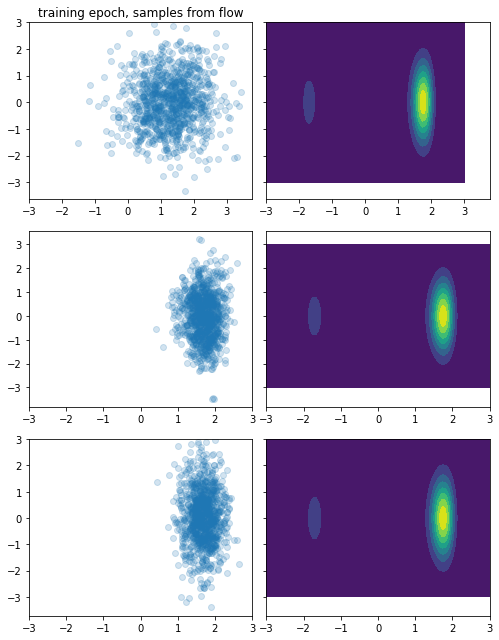

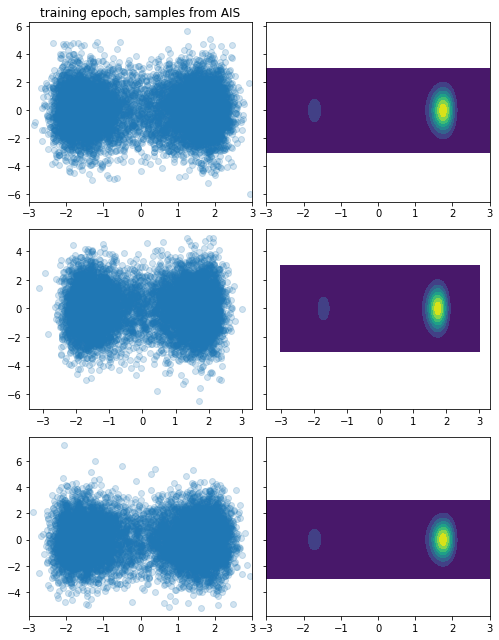

In [18]:
plot_samples_vs_contours_many_well(tester, n_samples=1000,
                                      title=f"training epoch, samples from flow")
plot_samples_vs_contours_many_well(tester, n_samples=None,
                                      title=f"training epoch, samples from AIS",
                                      samples_q=info_dict_before["samples"])

In [19]:
expectation, info_dict = tester.AIS_train.calculate_expectation(n_samples_expectation,
                                                                    expectation_function=expectation_function)
print(info_dict['effective_sample_size'].item() / n_samples_expectation)

nan


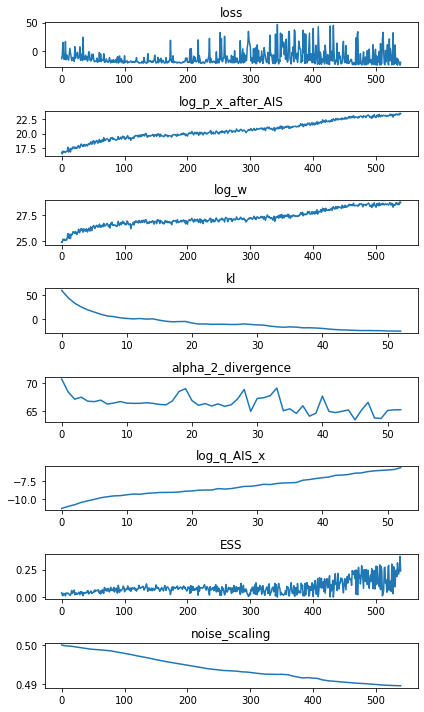

In [20]:
plot_history(history)

# Metrpolis-Hastings

In [ ]:
learnt_sampler = FlowModel(x_dim=dim, scaling_factor=2.0, flow_type="RealNVP", n_flow_steps=60)
tester = AIS_trainer(target, learnt_sampler, loss_type="DReG", n_distributions=20, n_steps_transition_operator=3,
                    step_size=0.5, transition_operator="Metropolis", train_AIS_params=True, learnt_dist_kwargs={"lr": 1e-4},
                    importance_param_lr=1e-3)

In [ ]:
expectation_before, info_dict_before = tester.AIS_train.calculate_expectation(n_samples_expectation,
                                                                    expectation_function=expectation_function)
print(info_dict_before['effective_sample_size'].item() / n_samples_expectation)

In [ ]:
plot_samples_vs_contours_many_well(tester, n_samples=1000,
                                      title=f"training epoch, samples from flow")
plot_samples_vs_contours_many_well(tester, n_samples=None,
                                      title=f"training epoch, samples from AIS",
                                      samples_q=info_dict_before["samples"])

# Train

In [ ]:
learnt_sampler = FlowModel(x_dim=dim, scaling_factor=2.0, flow_type="RealNVP", n_flow_steps=60)
tester = AIS_trainer(target, learnt_sampler, loss_type="DReG", n_distributions=20, n_steps_transition_operator=3,
                    step_size=0.5, transition_operator="Metropolis", train_AIS_params=True, learnt_dist_kwargs={"lr": 1e-4},
                    importance_param_lr=1e-4)

In [ ]:
history = tester.train(100, batch_size=int(1e3), intermediate_plots=True, n_plots=4, plotting_func=plotter)

In [ ]:
plot_samples_vs_contours_many_well(tester, n_samples=1000,
                                      title=f"training epoch, samples from flow")
plot_samples_vs_contours_many_well(tester, n_samples=None,
                                      title=f"training epoch, samples from AIS",
                                      samples_q=info_dict_before["samples"])

In [ ]:
history = tester.train(1000, batch_size=int(1e3), intermediate_plots=True, n_plots=4, plotting_func=plotter)

In [ ]:
plot_samples_vs_contours_many_well(tester, n_samples=1000,
                                      title=f"training epoch, samples from flow")
plot_samples_vs_contours_many_well(tester, n_samples=None,
                                      title=f"training epoch, samples from AIS",
                                      samples_q=info_dict_before["samples"])